## Machine Learning HW3 Simulation Part 

## (Convolutional Neural Network (CNN) on Cifar10 dataset)

## Amirmahdi Ansaripour (810198358)

In [86]:
import matplotlib.pyplot as plt 
import random
import numpy as np
import tensorflow.keras as tns
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


In [87]:
lr = 0.001
epoch_number = 50

In [88]:
(x_train_val, y_train_val), (x_test, y_test) = cifar10.load_data()

In [89]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, random_state = 0, test_size = 0.2)

### Part A & B: (showing random samples and splitting into train and test and validation sets)
As it is shown in the following section, the main dataset is divided into three parts: train, test, and validation.
Five random samples are also displayed.

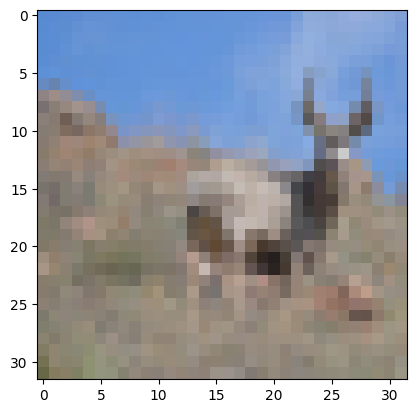

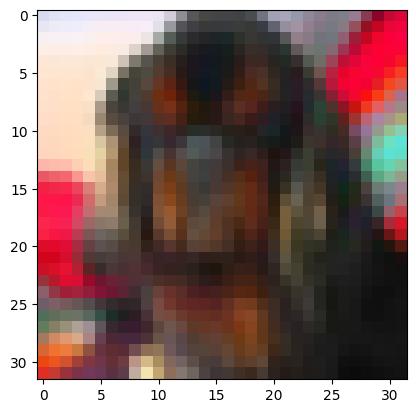

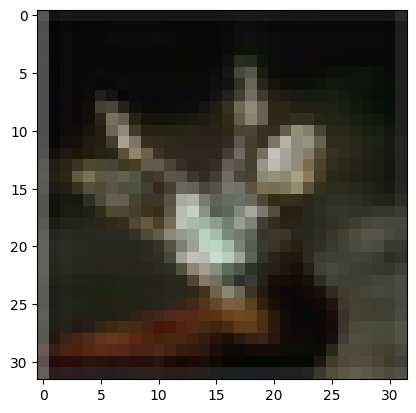

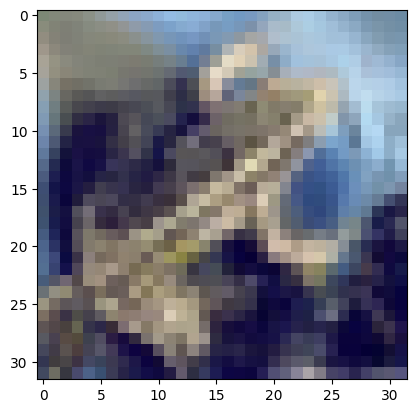

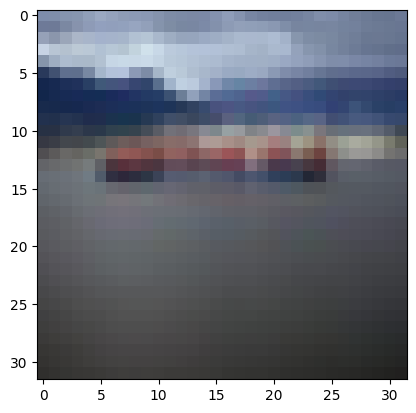

In [90]:
def display_randoms(num, length):
  for i in range(num):
    index = int(random.random() * (length - 1))
    plt.figure(i)
    plt.imshow(x_train_val[index])
    plt.show()

display_randoms(5, len(x_train_val))

In [91]:
print("Samples in train: ", len(x_train))
print("Samples in test: ", len(x_test))
print("Samples in validation: ", len(x_val))

Samples in train:  40000
Samples in test:  10000
Samples in validation:  10000


In [92]:
def normalize(train, test, val):
    train = train/255
    test = test/255
    val = val/255
    return train, test, val

def construct_CNN(Optimizer):
  CNN = Sequential()
  CNN.add(tns.layers.Conv2D(32,(3,3),input_shape = (32,32,3),activation='relu'))
  CNN.add(tns.layers.Conv2D(32,(3,3),input_shape = (32,32,3),activation='relu'))
  CNN.add(tns.layers.Conv2D(32,(3,3),input_shape = (32,32,3),activation='relu'))
  CNN.add(tns.layers.MaxPooling2D(pool_size = (2,2)))
  CNN.add(tns.layers.Dropout(0.25))
  CNN.add(tns.layers.Conv2D(64,(3,3),input_shape = (32,32,3),activation='relu'))
  CNN.add(tns.layers.Conv2D(64,(3,3),input_shape = (32,32,3),activation='relu'))
  CNN.add(tns.layers.Conv2D(64,(3,3),input_shape = (32,32,3),activation='relu'))
  CNN.add(tns.layers.MaxPooling2D(pool_size = (2,2)))
  CNN.add(tns.layers.Dropout(0.25))
  CNN.add(tns.layers.Flatten())
  CNN.add(tns.layers.Dense(512, activation ='relu'))
  CNN.add(tns.layers.Dropout(0.5))
  CNN.add(tns.layers.Dense(10, activation ='softmax'))
  CNN.compile(loss ='categorical_crossentropy', optimizer = Optimizer, metrics = ['accuracy'])
  return CNN


### Part C: (Designing a convulotional nueral network)
As described above, we have designed a CNN containing:

1) Convolutional layers which contains neurons having filters and activation funtions (relu).

2) Maxpooling layers (2x2 windows).

3) Dropout layers which randomly make sum weights zero.

4) Flatten layers which make the 2D array of images flattened.

In [93]:
def train_CNN_and_calc_accuracy(cnn, train, label_train, num_of_epochs, test_data):
    accuracy_list = cnn.fit(train, label_train, epochs = num_of_epochs, validation_data = test_data)

    return accuracy_list

In [106]:
def oneHot(subset):
    numerics = []
    for i in range(len(subset)):
      numerics.append(subset[i][0])
    array = np.array(len(numerics))
    oneHotted = np.zeros((len(numerics), 10))
    for i in range(len(oneHotted)):
      oneHotted[i][numerics[i]] = 1
    # print(oneHotted)
    return oneHotted
  
def plot_acc_loss(model_output):
    acc = model_output.history['accuracy']
    val_acc = model_output.history['val_accuracy']
    loss = model_output.history['loss']
    val_loss = model_output.history['val_loss']
    plt.figure(0)
    plt.plot(acc, color = 'r')
    plt.plot(val_acc, color = 'b')
    plt.title("Accuracy of train and validation sets")
    plt.ylabel("Accuracy")
    plt.xlabel("Num of epoch")
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.figure(1)
    plt.plot(loss, color = 'r')
    plt.plot(val_loss, color = 'b')
    plt.title("Loss of train and validation sets")
    plt.ylabel("Loss")
    plt.xlabel("Num of epoch")
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    return

def show_metrics(model, title):
    z = model.predict(x_test_norm)
    prediction = np.argmax(z, axis=1)
    print(title)
    print(classification_report(y_test, prediction))
    return

In [95]:
x_train_norm, x_test_norm, x_val_norm = normalize(x_train, x_test, x_val)
y_train_one_hot = oneHot(y_train)
y_test_one_hot = oneHot(y_test)
y_val_one_hot = oneHot(y_val)

In [96]:
CNN = construct_CNN(tns.optimizers.Adam(lr))

In [100]:
# print('Results of Adam optimizer on test set')
accuracy_list = train_CNN_and_calc_accuracy(CNN, x_train_norm, y_train_one_hot, epoch_number, (x_val_norm, y_val_one_hot))

Epoch 1/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6474 - accuracy: 0.7742 - val_loss: 0.8530 - val_accuracy: 0.7276
Epoch 2/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6346 - accuracy: 0.7757 - val_loss: 0.8020 - val_accuracy: 0.7374
Epoch 3/50
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6381 - accuracy: 0.7773 - val_loss: 0.7939 - val_accuracy: 0.7380
Epoch 4/50
1250/1250 [==============================] - 12s 10ms/step - loss: 0.6413 - accuracy: 0.7765 - val_loss: 0.8222 - val_accuracy: 0.7351
Epoch 5/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6339 - accuracy: 0.7801 - val_loss: 0.8306 - val_accuracy: 0.7313
Epoch 6/50
1250/1250 [==============================] - 8s 7ms/step - loss: 0.6402 - accuracy: 0.7784 - val_loss: 0.8021 - val_accuracy: 0.7431
Epoch 7/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6332 - accuracy: 0.7802 - val_loss: 0.8137 - val_acc

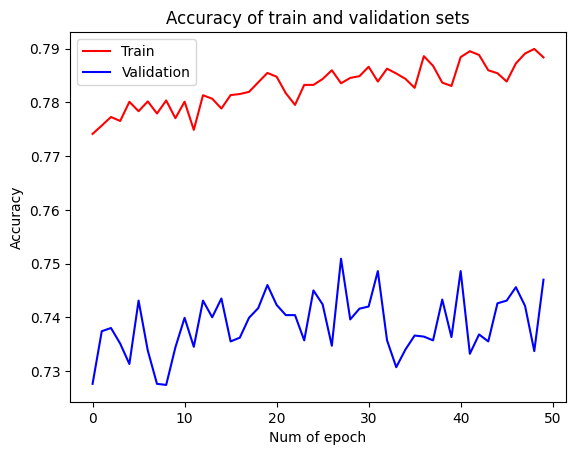

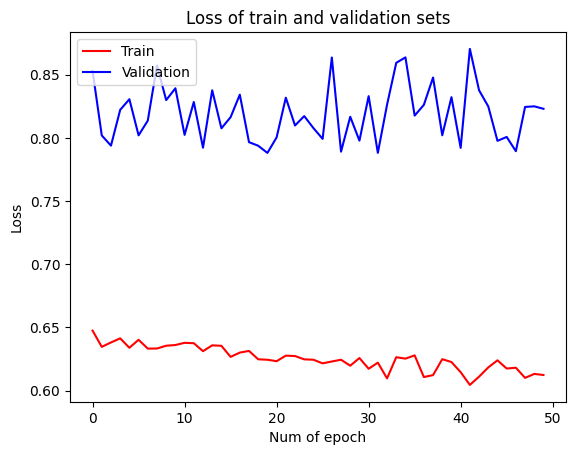

In [107]:
plot_acc_loss(accuracy_list)

In [102]:
show_metrics(CNN, 'Metrics of test set using Adam optimizer')

313/313 [==============================] - 1s 3ms/step
Metrics of test set using Adam optimizer
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1000
           1       0.86      0.87      0.87      1000
           2       0.68      0.61      0.64      1000
           3       0.56      0.55      0.56      1000
           4       0.72      0.66      0.69      1000
           5       0.70      0.64      0.67      1000
           6       0.76      0.83      0.79      1000
           7       0.79      0.76      0.78      1000
           8       0.76      0.86      0.81      1000
           9       0.82      0.82      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [112]:
CNN_with_sgd = construct_CNN(tns.optimizers.SGD(0.01))

In [113]:
accuracy_sgd = train_CNN_and_calc_accuracy(CNN_with_sgd, x_train_norm, y_train_one_hot, epoch_number, (x_val_norm, y_val_one_hot))

Epoch 1/50
1250/1250 [==============================] - 11s 7ms/step - loss: 2.2324 - accuracy: 0.1550 - val_loss: 2.1174 - val_accuracy: 0.2021
Epoch 2/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.0311 - accuracy: 0.2400 - val_loss: 1.8536 - val_accuracy: 0.3051
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8627 - accuracy: 0.3054 - val_loss: 1.7756 - val_accuracy: 0.3385
Epoch 4/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7589 - accuracy: 0.3488 - val_loss: 1.6960 - val_accuracy: 0.3710
Epoch 5/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6858 - accuracy: 0.3760 - val_loss: 1.5845 - val_accuracy: 0.4116
Epoch 6/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6193 - accuracy: 0.4027 - val_loss: 1.5190 - val_accuracy: 0.4394
Epoch 7/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5632 - accuracy: 0.4206 - val_loss: 1.4483 - val_accurac

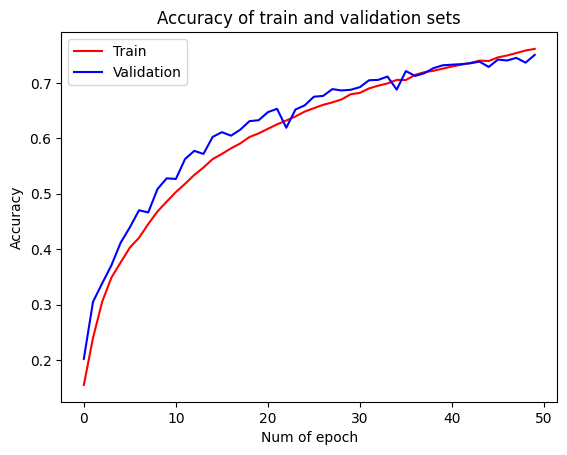

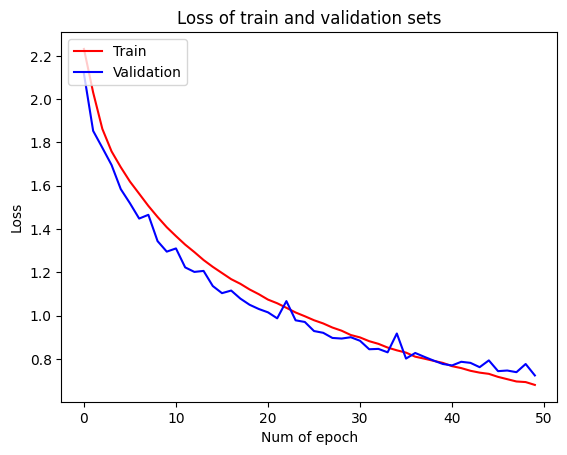

313/313 [==============================] - 1s 2ms/step
Metrics of test set using SGD optimizer
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1000
           1       0.89      0.82      0.86      1000
           2       0.71      0.56      0.63      1000
           3       0.53      0.62      0.57      1000
           4       0.70      0.73      0.72      1000
           5       0.70      0.59      0.64      1000
           6       0.82      0.79      0.81      1000
           7       0.79      0.79      0.79      1000
           8       0.73      0.90      0.81      1000
           9       0.84      0.80      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [117]:
plot_acc_loss(accuracy_sgd)
show_metrics(CNN_with_sgd, 'Metrics of test set using SGD optimizer')

In [146]:
CNN_with_rms_ = construct_CNN(tns.optimizers.experimental.RMSprop(learning_rate = 0.001))

In [147]:
accuracy_rms = train_CNN_and_calc_accuracy(CNN_with_rms_, x_train_norm, y_train_one_hot, 13, (x_val_norm, y_val_one_hot))

Epoch 1/13
1250/1250 [==============================] - 12s 8ms/step - loss: 1.8285 - accuracy: 0.3194 - val_loss: 1.5823 - val_accuracy: 0.4197
Epoch 2/13
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4474 - accuracy: 0.4829 - val_loss: 1.3358 - val_accuracy: 0.5105
Epoch 3/13
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2935 - accuracy: 0.5424 - val_loss: 1.1306 - val_accuracy: 0.5945
Epoch 4/13
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1953 - accuracy: 0.5799 - val_loss: 1.0761 - val_accuracy: 0.6217
Epoch 5/13
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1459 - accuracy: 0.6055 - val_loss: 1.0181 - val_accuracy: 0.6439
Epoch 6/13
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1250 - accuracy: 0.6156 - val_loss: 1.1722 - val_accuracy: 0.6103
Epoch 7/13
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1153 - accuracy: 0.6273 - val_loss: 1.0401 - val_accuracy

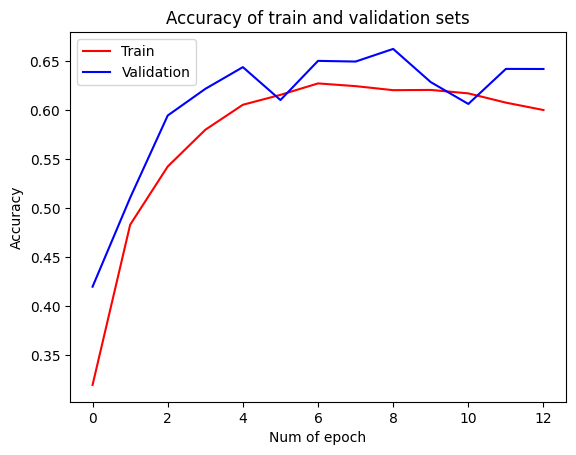

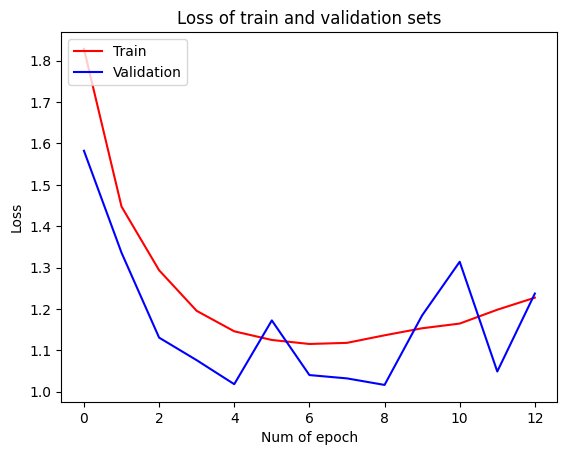

313/313 [==============================] - 1s 2ms/step
Metrics of test set using RMS optimizer
              precision    recall  f1-score   support

           0       0.66      0.53      0.58      1000
           1       0.89      0.74      0.81      1000
           2       0.47      0.56      0.51      1000
           3       0.38      0.58      0.46      1000
           4       0.63      0.57      0.60      1000
           5       0.76      0.34      0.47      1000
           6       0.76      0.72      0.74      1000
           7       0.82      0.60      0.70      1000
           8       0.53      0.92      0.67      1000
           9       0.84      0.70      0.77      1000

    accuracy                           0.63     10000
   macro avg       0.67      0.63      0.63     10000
weighted avg       0.67      0.63      0.63     10000



In [148]:
plot_acc_loss(accuracy_rms)
show_metrics(CNN_with_rms_, 'Metrics of test set using RMS optimizer')

### Part D: (displaying results of different activation functions)
In the graphs demonstrated above, different optimizer functions are analyzed. Optimizer functions are used when updating weights.

Adam and RMS optimizers are useful because they use momentums in order to control the updating process. For example, Adam and RMS optimizers define a coefficient. The coefficient shows how a new weight's value is similar to that of the previous step. 